1. Данные о погоде в Лондоне с 1979 по 2021. Датасет был взят с сайта www.kagle.com по [ссылке](https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data). Все данные реальны, они были загружены с веб-сайта European Climate Assessment and Dataset в 2022 году.
2. Все данные в датасете - числовые. В датасете представлены следующие атрибуты:
 - date - дата измерения в формате ГГГГММДД.
 - cloud_cover - облачность в октантах (0-8).
 - sunshine - время, когда светило солнце в часах (0-24).
 - global_radiation - энергия радиации в Вт/м2.
 - max_temp - максимальная температура за сутки в градусах Цельсия (°C).
 - mean_temp - средняя температура за сутки в градусах Цельсия (°C).
 - min_temp - минимальная температура за сутки в градусах Цельсия (°C).
 - precipitation - атмосферные осадки в мм.
 - pressure - давление в Паскалях.
 - snow_depth - глубина снежного покрова в см.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

df = pd.read_csv('london_weather.csv')
df.head()


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [41]:
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers
    

In [43]:
def show_data_info(data):
    print(f'Среднее значение: {data.mean()}')
    print(f'СКО: {data.std()}')
    print(f'Пропущенные значения: {str(data.isna().sum())}')
    outliers = detect_outliers(data)
    print(f'Выбросы: {len(outliers)}')
    if len(outliers) > 0:
        print(outliers[:10])
def show_data_hist(data, bins_, name, interval):
    plt.figure(figsize=(7,5))
    plt.hist(data, bins=bins_)
    plt.xticks(np.arange(min(data), max(data)+1, interval))
    plt.grid(True)
    plt.title(name)
    plt.show()
def show_corr_info(first_data, second_data, first_label, second_label):
    corr_matrix = np.corrcoef(first_data, second_data)
    print('Матрица корелляции: ')
    print(corr_matrix)
    
    plt.figure(figsize=(10, 5));
    plt.scatter(first_data, second_data);
    plt.xlabel(first_label);
    plt.ylabel(first_label);
    plt.title(f'Зависимость {first_data} от {second_data}');

Среднее значение: 5.268241743897663
СКО: 2.0700721035685343
Пропущенные значения: 19
Выбросы: 0


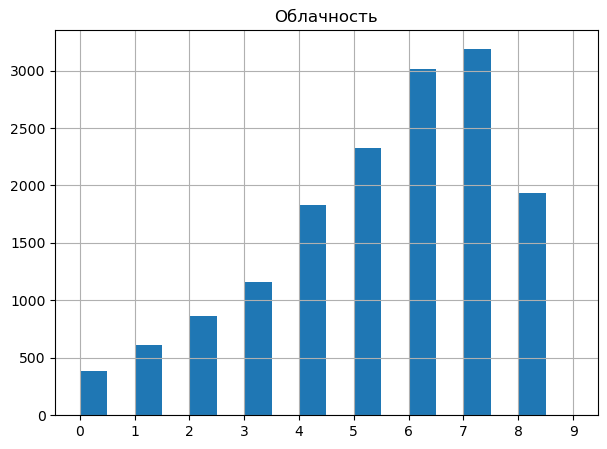

In [45]:
# Облачность
cloud_cover_array = df['cloud_cover']
show_data_info(cloud_cover_array)
show_data_hist(cloud_cover_array, 18, 'Облачность', 1)

Среднее значение: 4.350237924516003
СКО: 4.028339404679507
Пропущенные значения: 0
Выбросы: 0


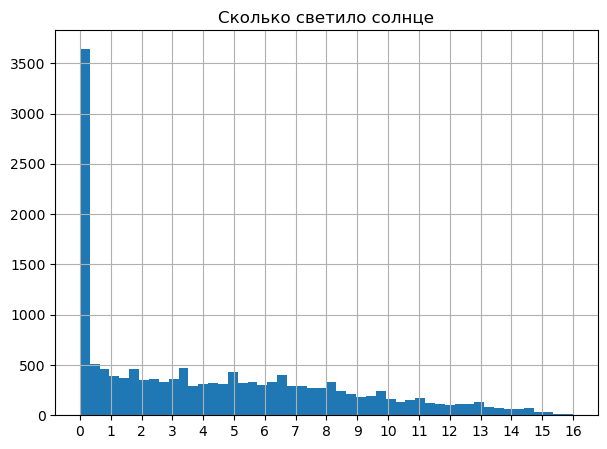

In [47]:
# Солнечно
sunshine_array = df['sunshine']
show_data_info(sunshine_array)
show_data_hist(sunshine_array, 50, 'Сколько светило солнце', 1)

Среднее значение: 118.75695078971414
СКО: 88.89827186362803
Пропущенные значения: 19
Выбросы: 0


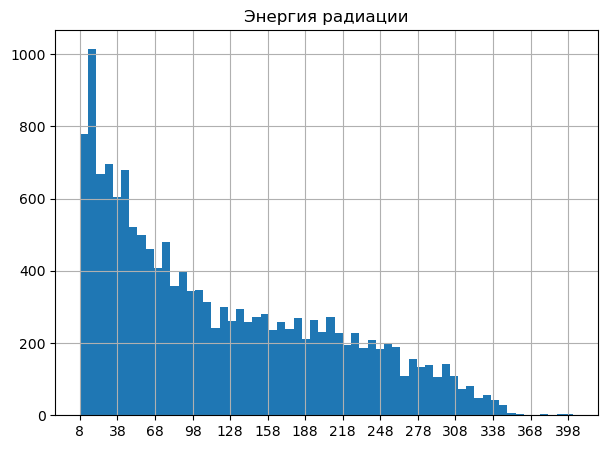

In [48]:
# Энергия радиации
global_radiation_array = df['global_radiation']
show_data_info(global_radiation_array)
show_data_hist(global_radiation_array, 60, 'Энергия радиации', 30)

Среднее значение: 15.388777306814477
СКО: 6.554753578982714
Пропущенные значения: 6
Выбросы: 11
2932     -6.2
4231     36.5
8982     35.2
8986     37.9
10061    35.5
13329    36.7
14814    37.9
15187    37.9
15194    36.5
15198    35.7
Name: max_temp, dtype: float64


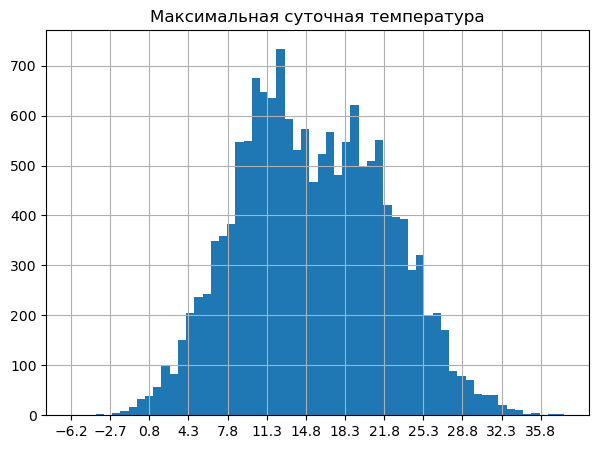

In [50]:
# Максимальная температура
max_temp_array = df['max_temp']
show_data_info(max_temp_array)
show_data_hist(max_temp_array, 60, 'Максимальная суточная температура', 3.5)

# Для пропущенных значений взять среднее двух ближайших дней.
# Если пропущено несколько дней подряд - вычислить по формуле top + (top - bottom) | (N + 1), где top - ближайший сверху, bottom - ближайший снизу, N - кол-во пропущенных подряд дней.

Среднее значение: 11.475511270826528
СКО: 5.729708517751972
Пропущенные значения: 36
Выбросы: 1
2933   -7.6
Name: mean_temp, dtype: float64


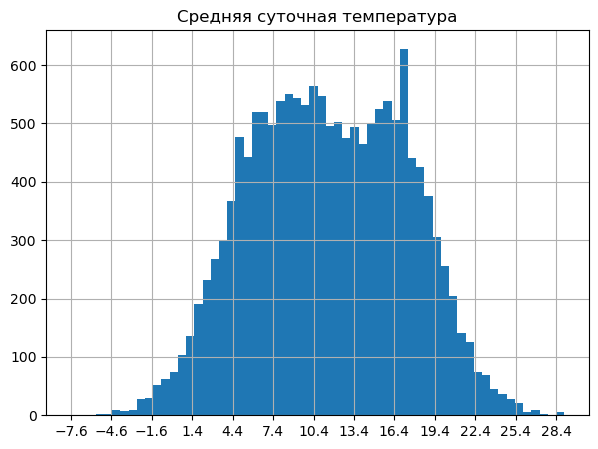

In [52]:
# Средняя температура
mean_temp_array = df['mean_temp']
show_data_info(mean_temp_array)
show_data_hist(mean_temp_array, 60, 'Средняя суточная температура', 3)
# Для пропущенных значений взять среднее двух ближайших дней.
# Если пропущено несколько дней подряд - вычислить по формуле top + (top - bottom) | (N + 1), где top - ближайший сверху, bottom - ближайший снизу, N - кол-во пропущенных подряд дней.

Среднее значение: 7.559867005671817
СКО: 5.32675580728825
Пропущенные значения: 2
Выбросы: 5
1077    -11.8
1109    -10.1
2597     -9.6
2934     -9.1
11676    -9.4
Name: min_temp, dtype: float64


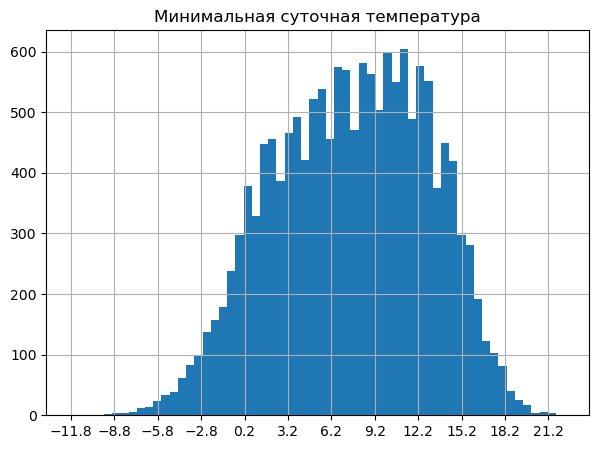

In [55]:
# Минимальная температура 
min_temp_array = df['min_temp']
show_data_info(min_temp_array)
show_data_hist(min_temp_array, 60, 'Минимальная суточная температура', 3)

# Для пропущенных значений взять среднее двух ближайших дней.
# Если пропущено несколько дней подряд - вычислить по формуле top + (top - bottom) | (N + 1), где top - ближайший сверху, bottom - ближайший снизу, N - кол-во пропущенных подряд дней.

Среднее значение: 1.6686338441473754
СКО: 3.7385400116897274
Пропущенные значения: 6
Выбросы: 2105
6      5.2
8      7.2
18     5.2
21     6.2
24     5.3
27     7.5
28     4.4
31    10.1
36     9.0
41     4.4
Name: precipitation, dtype: float64


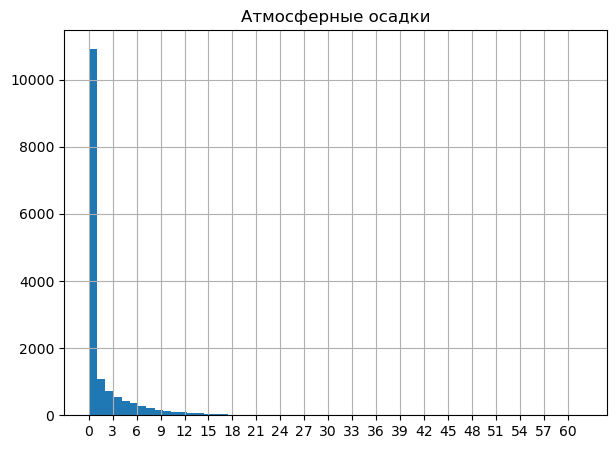

In [57]:
# Атмосферные осадки
precipitation_array = df['precipitation']
show_data_info(precipitation_array)
show_data_hist(precipitation_array, 60, 'Атмосферные осадки', 3)

# Для пропущенных значений взять среднее двух ближайших дней.
# Если пропущено несколько дней подряд - вычислить по формуле top + (top - bottom) | (N + 1), где top - ближайший сверху, bottom - ближайший снизу, N - кол-во пропущенных подряд дней.

Среднее значение: 101536.6055943144
СКО: 1049.7226043657072
Пропущенные значения: 4
Выбросы: 243
9       98700.0
28      98920.0
42      98430.0
43      98130.0
55     104270.0
84      98870.0
85      98270.0
86      98400.0
343     98860.0
348     98480.0
Name: pressure, dtype: float64


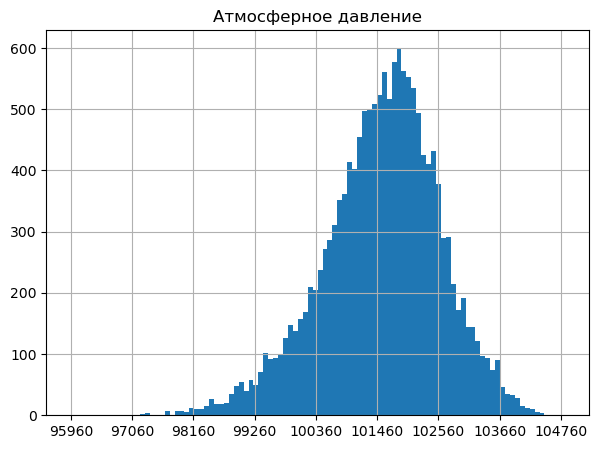

In [59]:
# Атмоферное давление
pressure_array = df['pressure']
show_data_info(pressure_array)
show_data_hist(pressure_array, 100, 'Атмосферное давление', 1100)

# Для пропущеных значений можно взять среднее значение ближайших измеренных дней, и прибавить 27 Па за каждый градус снижения средней температуры относительно среднего средней температуры ближайших измеренных дней.

Среднее значение: 0.03798561151079137
СКО: 0.5456328457171917
Пропущенные значения: 1441
Выбросы: 140
0     9.0
1     8.0
2     4.0
3     2.0
4     1.0
5     1.0
11    1.0
12    1.0
13    1.0
22    6.0
Name: snow_depth, dtype: float64


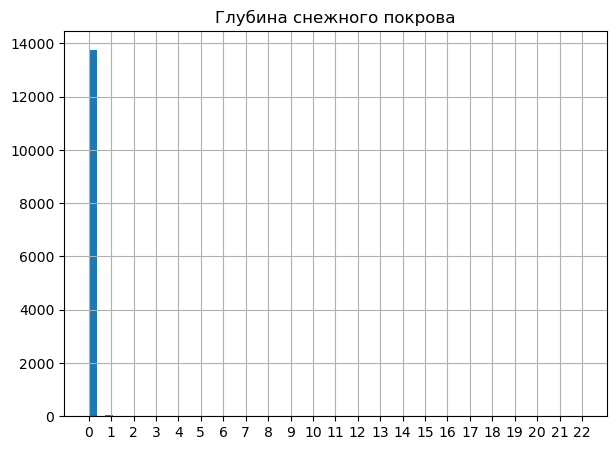

In [61]:
# Глубина снежного покрова
show_depth_array = df['snow_depth']
show_data_info(show_depth_array)
show_data_hist(show_depth_array, 60, 'Глубина снежного покрова', 1)

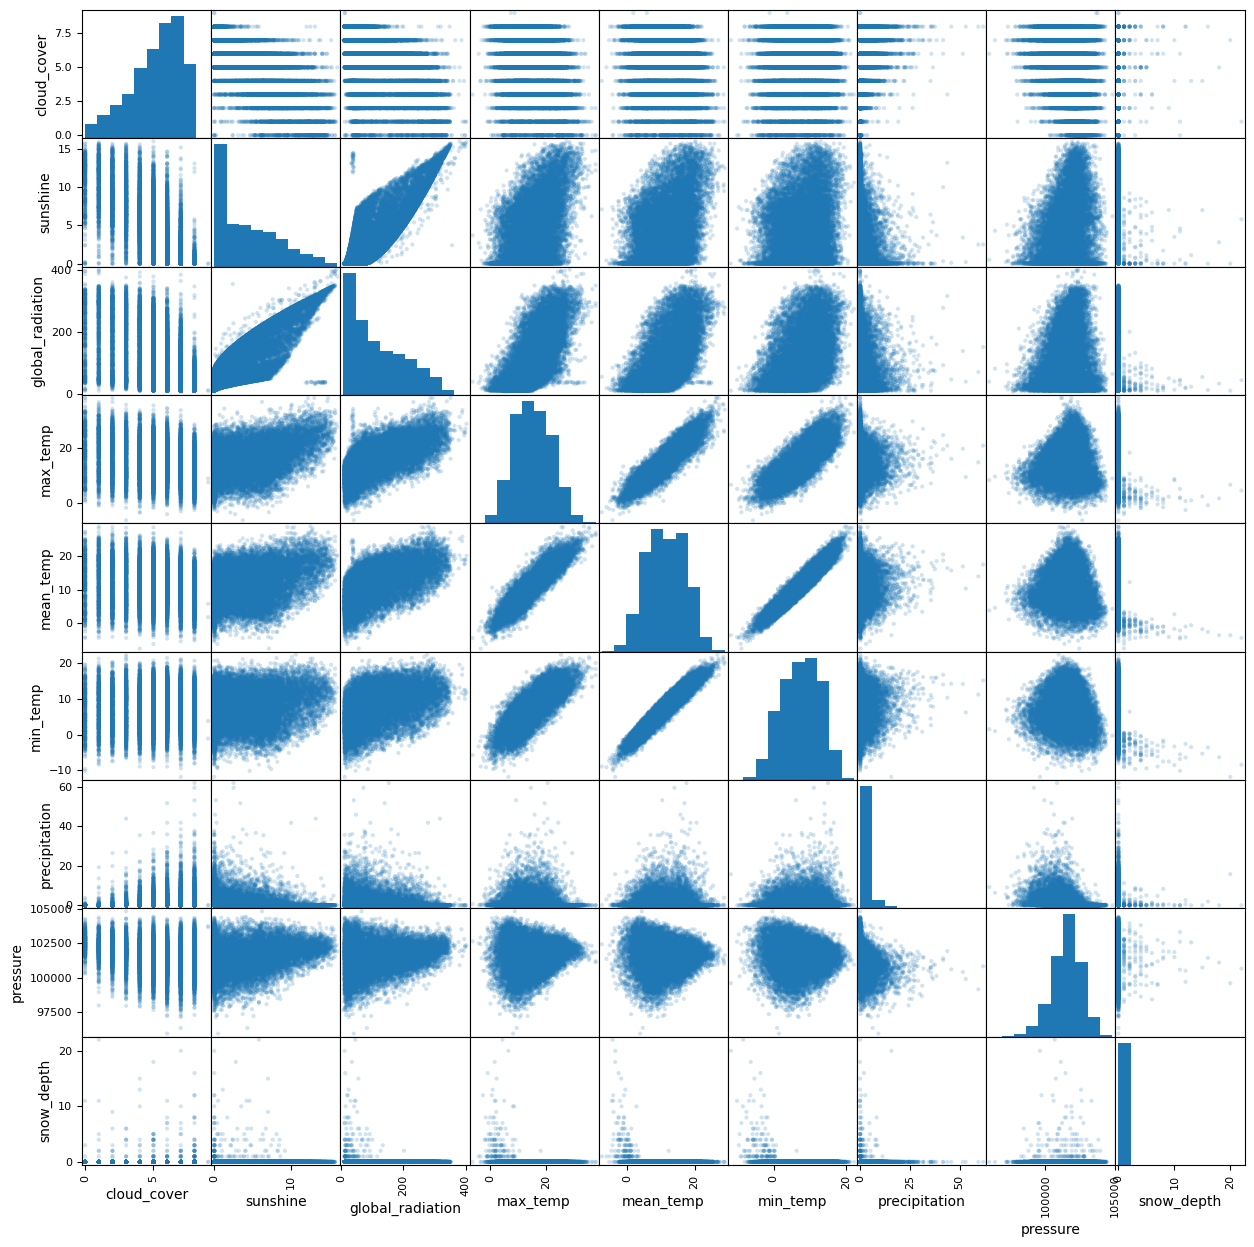

In [67]:
cut_df = df.drop(columns=['date'])
scatter_matrix(cut_df, alpha = 0.2, figsize = (15, 15), diagonal = 'hist')
plt.show()